# Assignment 1: Exploratory Data Analysis
- Group Number: Group 129
- Name: Uzair Mohiuddin
- Student Number: 8737165

## Introduction
### Goal of Analysis
The goal of the analysis is to perform "Exploratory Data Analysis (EDA)" on two datasets in different domains to uncover key insights using descriptive statistics, inferential analytics, and visualization techniques. 

The objective is to:
- Use descriptive analytics to under distribution of data using central tendency and dispersion measures.
- Perform hypothesis testing to understand correlations between factors.
- Generate insights that may be useful in decision-making. 

### Target Audience 
This report is intended for data scientists or domain experts who are interested in understanding the insights from the data and using it to make informed decisions.

In particular, the audience for the report includes:
- **Healthcare Professionals and Researchers**: For the heart failure prediction dataset. It will help them better understand health indicates that my predict heart failure.
- - **Educational Institutions and Training Organizations in Rural Areas**: For the Digital Literacy Education dataset. It will help them better understand what factors positively effect digital literacy education in Rural and Semi-Rural locations.

## Dataset 1: Heart Failure Prediction Dataset
- **Source**: Kaggle
- **Kaggle Link**: [Link](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
- **Rows and Columns**: 918 rows x 12 columns

### Description
- **Name**: Heart Failure Prediction Dataset
- **Author**: fedesoriano
- **Purpose**: Cardiovascular diseases (CVDs) is a significant reason for mortality. One event characteristic for CVDs is heart failure. This dataset combines 5 datasets, to identify 11 features that can help predict heart disease.
- **Shape**: 918 rows x 12 columns
- **Features of Dataset**:  
| Feature        | Categorical/Numerical | Description                        |  Metrics |  
| -------------- | --------------------- | ---------------------------------- | -------- |  
| Age            | Numerical (int64)     | Represents the age of the patient. | Years    |  
| Sex            | Categorical (object)  | Represents the sex of the patient. | M/F      |  
| ChestPainType  | Categorical (object)  | Represents the type of chest pain (typical angina, atypical angina, non-anginal pain, asymptomatic | TA/ATA/NAP/ASY |  
| RestingBP      | Numerical (int64)     | Represents the resting blood pressure | mmHg  |  
| Cholesterol    | Numerical (int64)     | Represents the serum cholesterol.   | mm/dl   |  
| FastingBS      | Numerical (int64)     | Represents the fasting blood sugar (>120 mg/dl, or otherwise). | 1/0 |  
| RestingECG     | Categorical (object)  | Represents resting electrocardiogram results (Normal, ST-T Wave Abnormality, Left Ventricular Hypertrophy | Normal/ST/LVH |  
| MaxHR          | Numercial (int64)     | Represents the maximum heart rate. | 60-202 |  
| ExerciseAngina | Categorical (object)  | Represents exerice-induced angina. | Y/N |  
| Oldpeak        | Numerical (float64)   | Oldpeak is a numerical value for depression uduced by exercise. | ST Value |  
| ST_Slope       | Categorical (object)  | The slope of the peak exercise ST segment. | Up/Flat/Down |  
| HeartDisease   | Numerical (int64)     | Output Class (1: Heart Disease, 0: Normal) | 0/1 |  

### Summary of 10 Insights
1. 75% of the individuals are above 47 years old.
2. Majority of individuals are male (728/918).
3. The most common type of chest pain is Asymptomatic Chest Pain (ASY), with more than 50% of individuals experiencing this type of chest pain. The least common type of chest pain is Typical Angina (TA).
4. Among all individuals, there is an almost equal distribution of individuals with low (<200 mg/dL), medium (200-239 mg/dL) and high (>240 mg/dL) cholesterol levels.
5. In cases of Heart Disease, the prevalence of the individual being male is almost 5-6 times more than being female. Whereas, in cases of no heart disease, it is a similar prevalence of male and female.
6. Among individuals with heart disease, Asymptomatic Angina (ASY) is experienced more than 4X as often as any other chest pain type. Furthermore, Atypical Angina (ATA) and Non-Anginal Pain (NAP) is found in both groups, but has a higher prevalence in the group with no heart disease.
7. Individuals who experience Asymptomatic Chest Pain (ASY) experience a higher prevalence of a Flat ST_Slope indicated reduced blood flow to heart. For individuals with a normal heart (Up ST_Slope), they experience similar levels of chest pain across all types (except a lower prevalence of typical angina (TA)).
8. There is a negative correlation between age and maximum heart rate, confirming that heart efficiency declines with age. 
9. There appears to be no relation between Cholesterol and Max Heart Rate.
10. Individuals with heart disease have a larger median age and there IQR for their age is larger than those without heart disease.
11. The strongest correlation between numerical values is moderate and exists between Heart Disease and MaxHR (-0.4), and HeartDisease and OldPeak (0.4). There is also a moderate negative correlation between MaxHR and Age (-0.38).

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# URL for dataset
heart_disease_dataset_url = "https://raw.githubusercontent.com/uzaaaiiir/jupyter/refs/heads/main/intro_ds_assignments/assignment1/heart.csv"

# Load dataset
df = pd.read_csv(heart_disease_dataset_url)

In [3]:
# Retrieve shape of dataset
df.shape

(918, 12)

In [4]:
'''
Get a list of the features and descriptions
- We see the columns and Dtype.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
'''
describe() generates descriptive statistics to summarize central tendency, dispersion, and shape. 
Retrieves numerical attributes

Numerical Attributes are: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease
'''
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
'''
Categorical attributes of the dataset
- Categorical attributes are: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
'''
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


## Insight #1 (Heart Failure Prediction Dataset)
- **Insight**: 75% of the individuals are above 47 years old. 
- **Type of Analysis**: r1: Univariate analysis (Numerical Data - Simple Histogram)

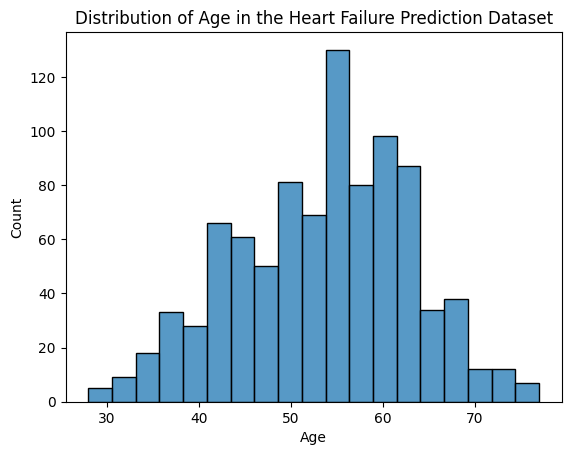

In [7]:
# Histogram of the Age column.
sns.histplot(data=df, x="Age")
plt.xlabel("Age")
plt.title("Distribution of Age in the Heart Failure Prediction Dataset")
plt.show()

In [8]:
# Numerical evidence of most patients being older than 47.
df[["Age"]].describe()

,Age
count,918.000000
mean,53.510893
std,9.432617
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


## Insight #2 (Heart Failure Prediction Dataset)
- **Insight**: Majority of individuals are male (728/918). 
- **Type of Analysis**: r2: Univariate analysis (Categorical Data - Countplot)

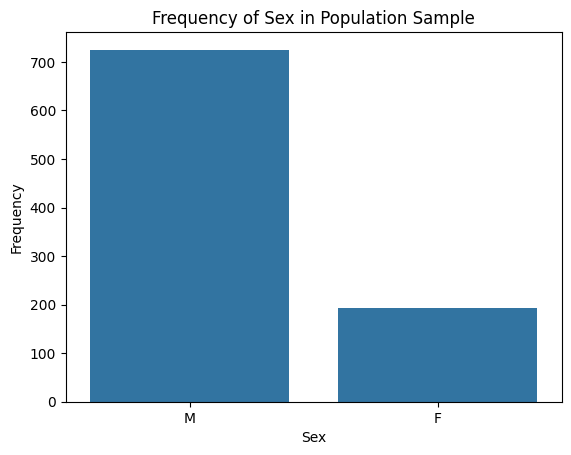

In [9]:
# Countplot to display count of Sex
sns.countplot(x="Sex", data=df)
plt.ylabel("Frequency")
plt.title("Frequency of Sex in Population Sample")
plt.show()

In [10]:
# Data regarding sex to back-up the diagram
df["Sex"].describe()

count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object

## Insight #3 (Heart Failure Prediction Dataset)
- **Insight**: The most common type of chest pain is Asymptomatic Chest Pain (ASY), with more than 50% of individuals experiencing this type of chest pain. The least common type of chest pain is Typical Angina (TA). 
- **Type of Analysis**: r2: Univariate analysis (Categorical Data - Countplot)

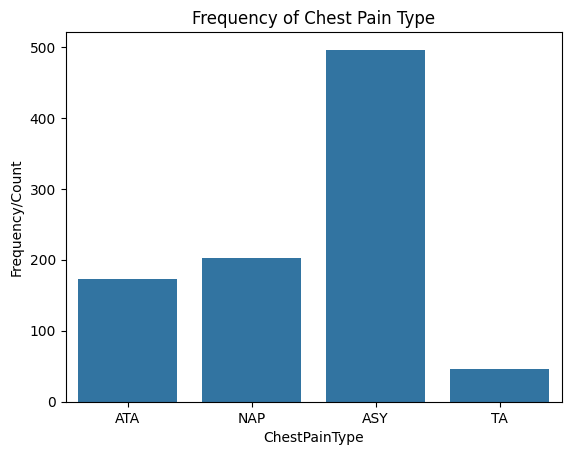

In [11]:
# Countplot to show the count of different types of chest pain
sns.countplot(x="ChestPainType", data=df)
plt.title("Frequency of Chest Pain Type")
plt.ylabel("Frequency/Count")
plt.show()

In [12]:
# Descriptive analytics to support countplot
df["ChestPainType"].describe()

count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

## Insight #4 (Heart Failure Prediction Dataset)
- **Insight**: Among all individuals, there is an almost equal distribution of individuals with low (<200 mg/dL), medium (200-239 mg/dL) and high (>240 mg/dL) cholesterol levels.
- **Type of Analysis**: r3: Univariate analysis (Categorical Data - Grouped-Data Countplot)

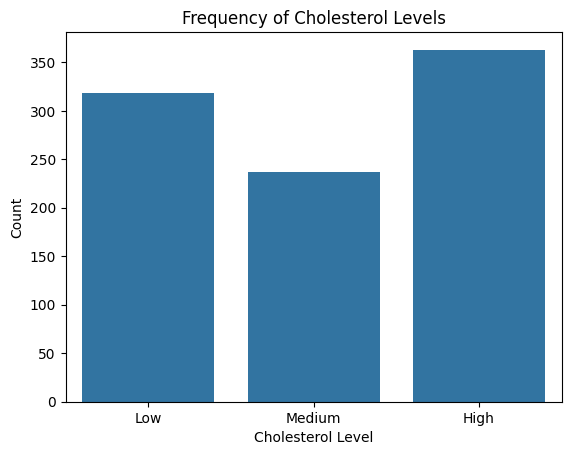

In [13]:
# Make a copy of the dataframe
df_copy = df.copy(deep=True)

'''
Group Cholesterol into high, medium and low 
- high = 240mg/dl or higher
- medium = 200-239 mg/dl
- low = less than 200 mg/dl
'''

df_copy['Cholesterol'] = pd.cut(df['Cholesterol'], bins=[-1000, 199, 239, 10000], labels=['Low', 'Medium', 'High'])

sns.countplot(x="Cholesterol", data=df_copy)
plt.title("Frequency of Cholesterol Levels")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.show()

In [14]:
# Values corresponding to the above count plot 
df_copy['Cholesterol'].value_counts()

Cholesterol
High      363
Low       318
Medium    237
Name: count, dtype: int64

## Insight #5 (Heart Failure Prediction Dataset)
- **Insight**: In cases of Heart Disease, the prevalence of the individual being male is almost 5-6 times more than being female. Whereas, in cases of no heart disease, it is a similar prevalence of male and female.
- **Type of Analysis**: r4: Bivariate analysis (Categorical Data - Compare categories with 2 values)

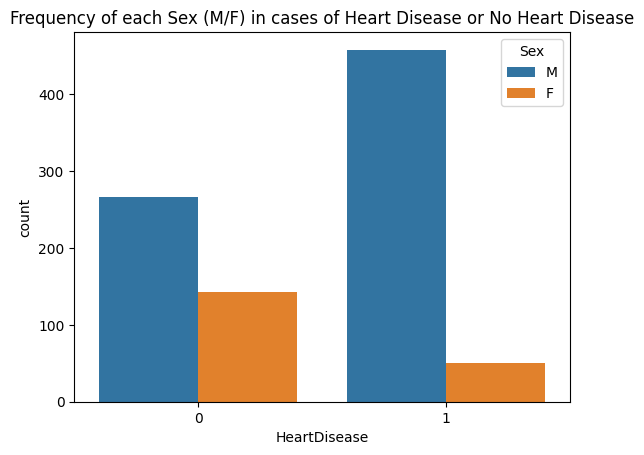

In [15]:
'''
Countplot taking a look at two categories (Sex and HeartDisease)
'''
sns.countplot(x="HeartDisease", hue="Sex", data=df)
plt.title("Frequency of each Sex (M/F) in cases of Heart Disease or No Heart Disease")
plt.show()

In [16]:
'''
Count data for the cross tabulation of Sex and HeartDisease.
'''
male = df[df['Sex'] == 'M']
female = df[df['Sex'] == 'F']

male_heart_disease = male['HeartDisease']
female_heart_disease = female['HeartDisease']

t_stat, p_value = stats.ttest_ind(male_heart_disease, female_heart_disease)
print("t-value is", t_stat)
print("p-value is", p_value)

pd.crosstab(df['Sex'], df['HeartDisease'], margins=True)

t-value is 9.708407894487765
p-value is 2.8218978236832577e-21


HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


## Insight #6 (Heart Failure Prediction Dataset)
- **Insight**: Among individuals with heart disease, Asymptomatic Angina (ASY) is experienced more than 4X as often as any other chest pain type. Furthermore, Atypical Angina (ATA) and Non-Anginal Pain (NAP) is found in both groups, but has a higher prevalence in the group with no heart disease. 
- **Type of Analysis**: r5: Bivariate analysis (Categorical/Categories Data - Compare categories with more than 2 values)

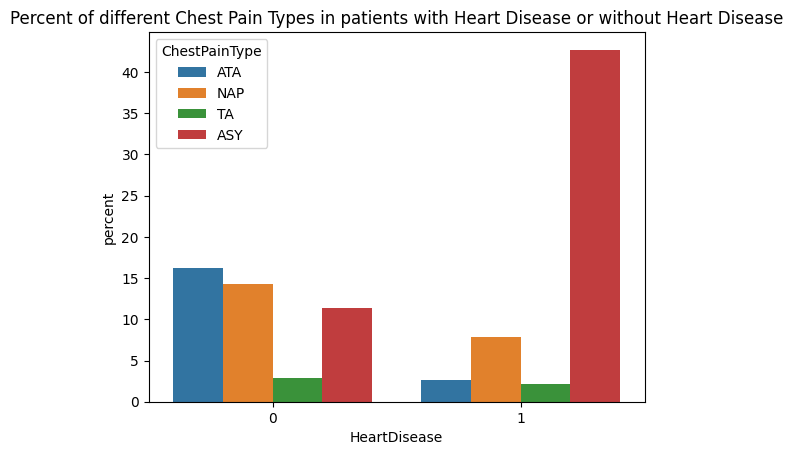

In [17]:
'''
Countplot to compare HeartDisease with ChestPainType.
'''
sns.countplot(x="HeartDisease", hue="ChestPainType", data=df, stat="percent")
plt.title("Percent of different Chest Pain Types in patients with Heart Disease or without Heart Disease")
plt.show()

In [18]:
'''
Count data for the cross tabulation of ChestPainType and HeartDisease.
- In patients with Heart Disease, 392/508 have Asymptomatic Chest Pain.
- In patients without heart disease, ASY, ATA, and NAP have a similar prevalence.
'''
pd.crosstab(df['HeartDisease'], df['ChestPainType'], margins=True)

ChestPainType,ASY,ATA,NAP,TA,All
HeartDisease,,,,,
0,104,149,131,26,410
1,392,24,72,20,508
All,496,173,203,46,918


## Insight #7 (Heart Failure Prediction Dataset)
- **Insight**: Individuals who experience Asymptomatic Chest Pain (ASY) experience a higher prevalence of a Flat ST_Slope indicated reduced blood flow to heart. For individuals with a normal heart (Up ST_Slope), they experience similar levels of chest pain across all types (except a lower prevalence of typical angina (TA)).
- **Type of Analysis**: r5: Bivariate analysis (Categorical/Categorical - Compare categories with more than 2 values)

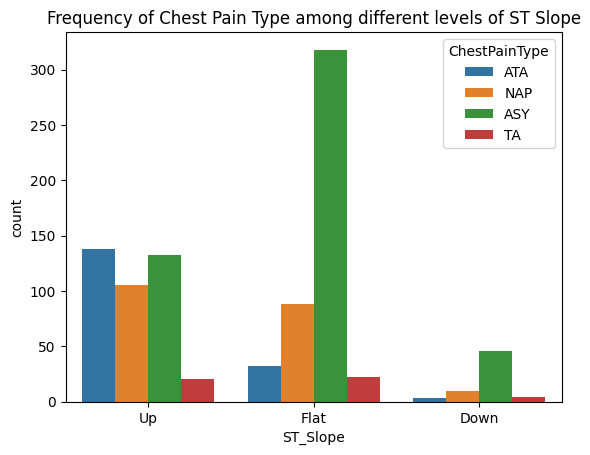

In [19]:
'''
Bivariate countplot comparing ST_Slope and ChestPainType.
- ST_Slope measured the slope of the ST Segment during exercise. 
  - Flat means potentially reduced blood flow.
  - Up means normal heart.
  - Down means high risk of heart disease. 
'''

sns.countplot(x="ST_Slope", hue="ChestPainType", data=df)
plt.title("Frequency of Chest Pain Type among different levels of ST Slope")
plt.show()

In [20]:
'''
Count data for the cross tabulation of ChestPainType and HeartDisease.
- In patients with Heart Disease, 392/508 have Asymptomatic Chest Pain.
- In patients without heart disease, ASY, ATA, and NAP have a similar prevalence.
'''
pd.crosstab(df['ST_Slope'], df['ChestPainType'], margins=True)

ChestPainType,ASY,ATA,NAP,TA,All
ST_Slope,,,,,
Down,46,3,10,4,63
Flat,318,32,88,22,460
Up,132,138,105,20,395
All,496,173,203,46,918


## Insight #8 (Heart Failure Prediction Dataset)
- **Insight**: There is a negative correlation between age and maximum heart rate, confirming that heart efficiency declines with age. 
- **Type of Analysis**: r6: Bivariate Analysis (Numerical/Numerical - Scatterplot)

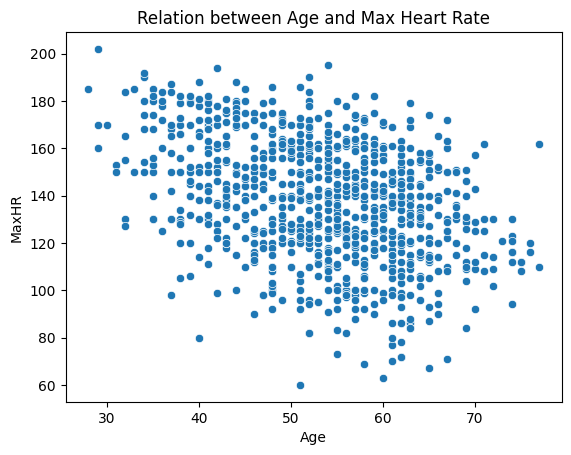

In [21]:
'''
Plot relationship between Age and MaxHR.
'''
sns.scatterplot(x="Age", y="MaxHR", data=df)
plt.title("Relation between Age and Max Heart Rate")
plt.show()

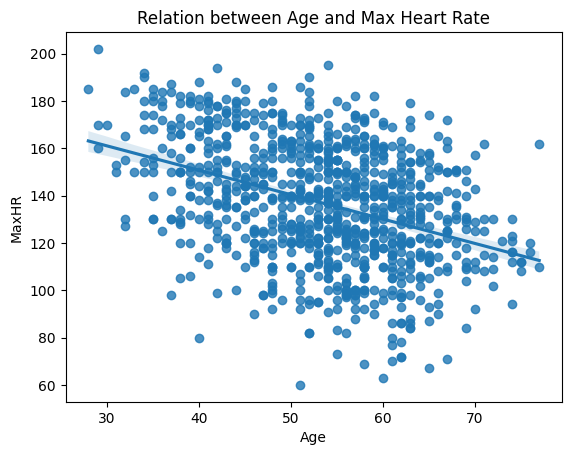

T-Test for MaxHR between Heart Disease vs. No Heart Disease: t-stat=-13.22548998290478, p-value=1.1377859840278097e-36


In [22]:
'''
To better visualize the trend, we can use regplot.
'''
sns.regplot(x="Age", y="MaxHR", data=df)
plt.title("Relation between Age and Max Heart Rate")
plt.show()

t_stat, p_value = stats.ttest_ind(df[df['HeartDisease']==1]['MaxHR'], df[df['HeartDisease']==0]['MaxHR'])
print(f"T-Test for MaxHR between Heart Disease vs. No Heart Disease: t-stat={t_stat}, p-value={p_value}")

## Insight #9 (Heart Failure Prediction Dataset)
- **Insight**: There appears to be no relation between Cholesterol and Max Heart Rate. 
- **Type of Analysis**: r6: Bivariate analysis (Numerical/Numerical - Scatterplot)

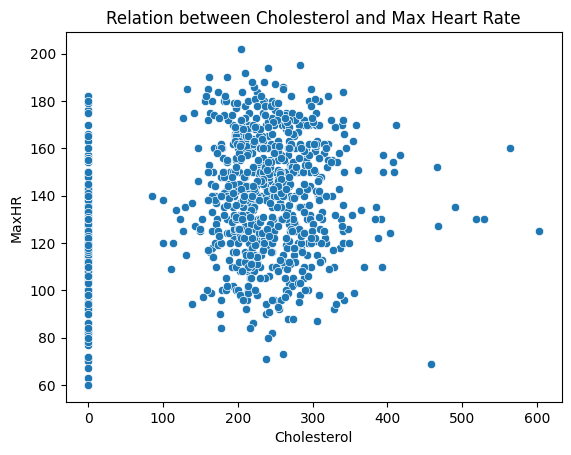

In [23]:
'''
Plot relationship between Age and MaxHR.
'''
sns.scatterplot(x="Cholesterol", y="MaxHR", data=df)
plt.title("Relation between Cholesterol and Max Heart Rate")
plt.show()

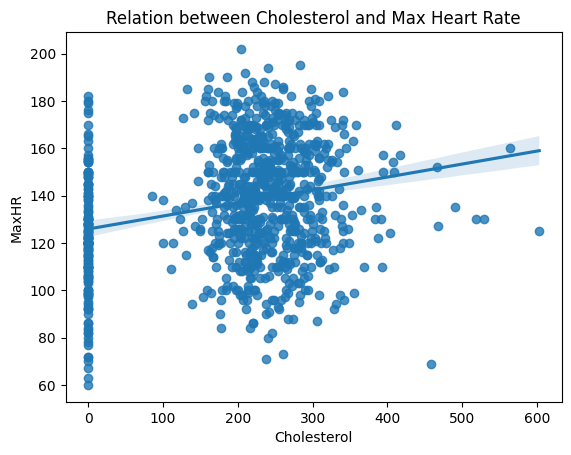

In [24]:
'''
To better visualize the trend, we can use regplot.
'''
sns.regplot(x="Cholesterol", y="MaxHR", data=df)
plt.title("Relation between Cholesterol and Max Heart Rate")
plt.show()

## Insight #10 (Heart Failure Prediction Dataset)
- **Insight**: Individuals with heart disease have a larger median age and there IQR for their age is larger than those without heart disease. 
- **Type of Analysis**: r7: Bivariate analysis (Numerical/Categorical - Split data by certain categories)

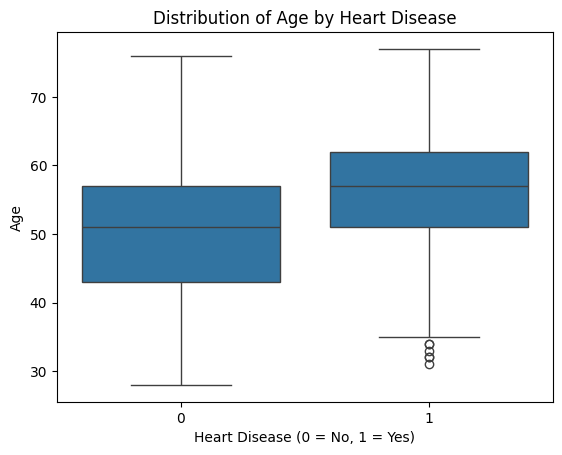

In [25]:
sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.title("Distribution of Age by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

## Additional Insight
- **Insight**: The strongest correlation between numerical values is moderate and exists between Heart Disease and MaxHR (-0.4), and HeartDisease and OldPeak (0.4). There is also a moderate negative correlation between MaxHR and Age (-0.38).
- **Type of Analysis**: r6: Bivariate analysis (Numerical/Numerical - Scatterplot/Heatmap)

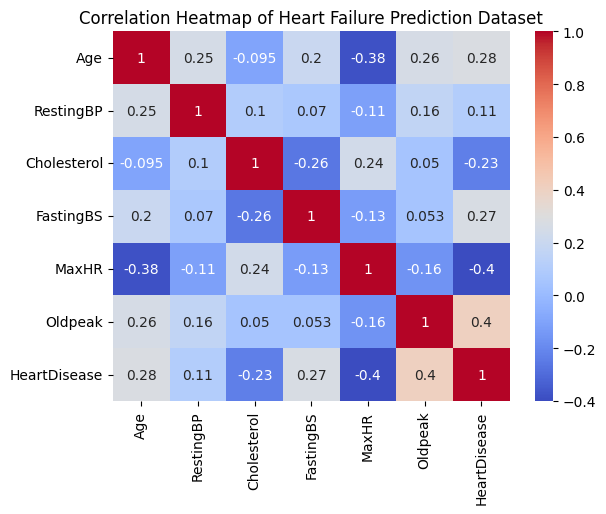

In [26]:
numeric_df = df.select_dtypes(include=["float64", "int64"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Heart Failure Prediction Dataset")
plt.show()

## Conclusion
### Key Takeaways
1. Men are more likely to have heart disease.
2. Those with heart disease have a significant likelihood to experience asymptomatic chest pain.
3. There is no standalone relationship between cholesterol levels and heart disease.
4. Max heart rate decreases with age, and older individuals are more likely to have heart disease. 
5. There is reduced flow to heart (ST_Slope) with individuals have asymptomatic chest pain.

## References
- (Kaggle Dataset)[https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data]
- (Pandas Docs)[https://pandas.pydata.org/docs/reference/index.html]
- (Seaborn Docs)[https://docs.scipy.org/doc/scipy/reference/index.html]


## Dataset 2: Digital Literacy Education Dataset
- **Source**: Kaggle
- **Kaggle Link**: [Link](https://www.kaggle.com/datasets/ziya07/digital-literacy-education-dataset)
- **Rows and Columns**: 1000 rows x 23 columns

### Description
- **Name**: Digital Literacy Education Dataset
- **Author**: Ziya
- **Purpose**: The dataset was gathered from research in improving digital literacy in rural areas. It includes data on the demographics, learning interaction with digital literacy education, and post-training outcomes. 
- **Shape**: 1000 rows x 23 columns
- **Features of Dataset**:  
| Feature                                      | Categorical/Numerical | Metrics                      |  Description |
| -------------------------------------------- | --------------------- | ---------------------------- | ------------------------------------------------------------ |  
| User_ID                                      | Categorical (object)  | ID                           | Represents the ID of the individual.              |  
| Age                                          | Numerical (int64)     | Years                        | Represents the age of the individual.             |  
| Gender                                       | Categorical (object)  | M/F/Other                    | Represents the gender of the individual.          |  
| Education_Level                              | Categorical (object)  | Primary/Secondary/Highschool | Represents the education level of the individual. |  
| Employment_Status                            | Categorical (object)  | Unemployed/Self-Employed/Farmer/Other/Student | Represents the employment status of the individual|  
| Household_Income                             | Categorical (object)  | Low/Medium/High              | Represents the houseold income of the individual. |  
| Location_Type                                | Categorical (object)  | Rural/Semi-Rural             | Represents the location type of the individual.   |  
| Basic_Computer_Knowledge_Score               | Numerical (int64)     | Score                        | Represents the pre-training score for basic computer knowledge. |  
| Internet_Usage_Score                         | Numerical (int64)     | Score                        | Represents the pre-training score for internet usage. |  
| Mobile_Literacy_Score                        | Numerical (int64)     | Score                        | Represents the pre-training score for mobile literacy. |  
| Post_Training_Basic_Computer_Knowledge_Score | Numerical (int64)     | Score                        | Represents the post-training score for basic computer knowledge. |  
| Post_Training_Internet_Usage_Score           | Numerical (int64)     | Score                        | Represents the post-training score for internet usage. |  
| Post_Training_Mobile_Literacy_Score          | Numerical (int64)     | Score                        | Represents the post-training score for mobile literacy. |  
| Modules_Completed                            | Numerical (int64)     | Number                       | Represents the number of modules completed by the individual during training. |  
| Average_Time_Per_Module                      | Numerical (float64)   | Number                       | Represents the average time spent per module during training. |  
| Quiz_Performance                             | Numerical (int64)     | Number                       | Represents the quiz performance during training. |  
| Session_Count                                | Numerical (int64)     | Number                       | Represents the number of sessions completed during training. |  
| Engagement_Level                             | Categorical (object)  | High/Medium/Low              | Represents the engagement level during the training (behavioural insight). |  
| Adaptability_Score                           | Numerical (int64)     | Score                        | Repreesnts the adaptability score during training (behavioural insight). |  
| Feedback_Rating                              | Numerical (int64)     | Rating (1-5)                 | Represents the feedback rating (behavioural insight). |  
| Skill_Application                            | Numerical (int64)     | Score (1-100)                | Represents an outcome measure of applying their skill after training. |  
| Employment_Impact                            | Categorical (object)  | No/Yes                       | Represents an outcome measure if the training impacted employment. |  
| Overall_Literacy_Score                       | Numerical (float64)   | Score (1-100)                | Represents an outcome measure of overall literacy score after training. |  
- **Missing Data**: Missing 222 values for `Education_Level`.

### Summary of 10 Insights
1. There is a uniform distribution of individuals, where all individuals were between 20-60 years of age. Furhtermore, the Basic Computer Knowedge, Internet Usage Score, and Mobile Literacy Scores appear generally uniformly distributed, which indicate that before training there is varying levels of digital literacy, with a mean of about 25. However, in the post-training Basic Computer Knowledge, Internet Usage Score, and Mobile literacy, the mean increases to about 60. At first glance, it appears that training results in digital literacy levels increasing in Rural areas. 
2. In terms of demographic insights about the dataset, there was an equal distribution of males and females, there was an equal distribution of education levels (primary, secondary, and highschool), and there was an approximately equal distribution among employment statuses. Majority of individuals belonged to a Rural location, and had a low household income (60% of individuals).
3. In terms of the outcome measures of digital literacy training, most indiviudals (70%) reported that digital literacy training had no impact on employment. 
4. If an individual lives is from a low or medium income household, they are more likely to be from a Rural location, compared to being from a Semi-Rural location. 
5. There is no difference in engagement levels in the digital literacy training, regardless of individuals have a primary school, secondary school, or highschool education level.
6. There is no relation between the Engagement in the Digital Literacy Education and Overall Literacy Rates achieved. Engagement metrics refer to session counts, modules completed, average time spend per module, and quiz performance.  
7. Similar to overall literacy rates, there is no correlation between engagement metrics (session count, modules completed, average time per module, quiz performance) during digital literacy training and post training basic computer knowledge scores. 
8. There is a strong positive correlation between pre-training values and post-training values for basic computer knowledge score (r=0.86), internet usage score (r=0.86), and mobile literacy scores (r=0.86). Furthermore, there is a moderate correlation between pre-training and post-training values for basic computer knowledge, internet usage, and mobile literacy with overall literacy score. This means that those scores correlate positively with overall literacy scores.
9. There is no correlation between age and overall literacy scores.
10. There appears to be no correlation between demographic information (location type, education level, household income, employment status) on overall literacy scores. The mean values literacy scores are the same across all attributes in each demographic category. 

In [27]:
# URL for dataset
digital_literacy_dataset_url = "https://raw.githubusercontent.com/uzaaaiiir/jupyter/refs/heads/main/intro_ds_assignments/assignment1/digital_literacy_dataset.csv"

# Load dataset
digital_lit_df = pd.read_csv(digital_literacy_dataset_url)

In [28]:
# Retrieve shape of dataset (10000 rows, 20 columns)
digital_lit_df.shape

(1000, 23)

In [29]:
'''
Retrieve info about our dataset, including non-null counts and data types).
'''
digital_lit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

In [30]:
'''
Numerical attributes found in our dataset. 
- Include: Age, Basic_Computer_Knowledge_Score, Internet_Usage_Score, Mobile_Literacy_Score, Post_Training_Basic_Computer_Knowledge_Score, Post_Training_Internet_Usage_Score,
  Post_Training_Mobile_Literacy_Score, Modules_Completed, Average_Time_Per_Module, Quiz_Performance, Session_Count, Adaptability_Score, Feedback_Rating, Feedback_Rating,
  Overall_Literacy_Score
'''
digital_lit_df.describe()

,Age,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Adaptability_Score,Feedback_Rating,Skill_Application,Overall_Literacy_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,40.864000,24.970000,24.822000,25.728000,60.141000,60.008000,60.572000,10.022000,20.010160,80.322000,19.994000,74.840000,2.998000,75.565000,60.23040
std,13.573568,14.838439,15.045088,15.002036,17.238628,17.646737,17.619059,3.188367,5.812247,11.967436,6.033603,14.446907,1.407827,14.852487,10.29046
min,18.000000,0.000000,0.000000,0.000000,21.000000,21.000000,20.000000,5.000000,10.070000,60.000000,10.000000,50.000000,1.000000,50.000000,32.40000
25%,29.000000,12.000000,12.000000,12.000000,47.000000,46.000000,47.000000,7.000000,15.010000,70.000000,15.000000,63.000000,2.000000,63.000000,53.27500
50%,41.000000,25.000000,25.000000,26.000000,61.000000,60.000000,61.000000,10.000000,20.005000,81.000000,20.000000,75.000000,3.000000,75.000000,60.30000
75%,52.000000,37.000000,38.000000,38.000000,73.000000,73.000000,74.000000,13.000000,24.955000,91.000000,25.000000,87.000000,4.000000,88.000000,67.12500
max,64.000000,50.000000,50.000000,50.000000,98.000000,100.000000,100.000000,15.000000,30.000000,100.000000,30.000000,100.000000,5.000000,100.000000,89.90000


In [31]:
'''
Categorical attributes found in our dataset.
- Include: User_ID, Gender, Education_Level, Education_Level, Household_Income, Location_Type, Engagement_Level, Employment_Impact
'''
digital_lit_df.describe(include="object")

,User_ID,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Engagement_Level,Employment_Impact
count,1000,1000,788,1000,1000,1000,1000,1000
unique,1000,3,3,5,3,2,3,2
top,U1000,Female,Primary,Unemployed,Low,Rural,Medium,No
freq,1,465,274,245,595,702,474,705


## Insight #1 (Digital Literacy Education Dataset)
- **Insight**: There is a uniform distribution of individuals, where all individuals were between 20-60 years of age. Furhtermore, the Basic Computer Knowedge, Internet Usage Score, and Mobile Literacy Scores appear generally uniformly distributed, which indicate that before training there is varying levels of digital literacy, with a mean of about 25. However, in the post-training Basic Computer Knowledge, Internet Usage Score, and Mobile literacy, the mean increases to about 60. At first glance, it appears that training results in digital literacy levels increasing in Rural areas.  
- **Type of Analysis**: r1: Univariate analysis (Numerical Data - Simple Histogram)

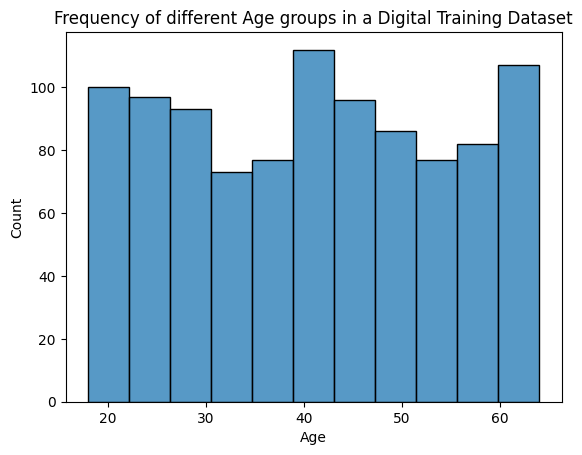

<Figure size 640x480 with 0 Axes>

In [32]:
'''
Evaluate simple numerical insight about the distribution of ages among the digital literacy training dataset.
'''
sns.histplot(data=digital_lit_df, x='Age')
plt.title("Frequency of different Age groups in a Digital Training Dataset")
plt.figure()
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Basic_Computer_Knowledge_Score'}>,
        <Axes: title={'center': 'Internet_Usage_Score'}>,
        <Axes: title={'center': 'Mobile_Literacy_Score'}>],
       [<Axes: title={'center': 'Post_Training_Basic_Computer_Knowledge_Score'}>,
        <Axes: title={'center': 'Post_Training_Internet_Usage_Score'}>,
        <Axes: title={'center': 'Post_Training_Mobile_Literacy_Score'}>,
        <Axes: title={'center': 'Modules_Completed'}>],
       [<Axes: title={'center': 'Average_Time_Per_Module'}>,
        <Axes: title={'center': 'Quiz_Performance'}>,
        <Axes: title={'center': 'Session_Count'}>,
        <Axes: title={'center': 'Adaptability_Score'}>],
       [<Axes: title={'center': 'Feedback_Rating'}>,
        <Axes: title={'center': 'Skill_Application'}>,
        <Axes: title={'center': 'Overall_Literacy_Score'}>, <Axes: >]],
      dtype=object)

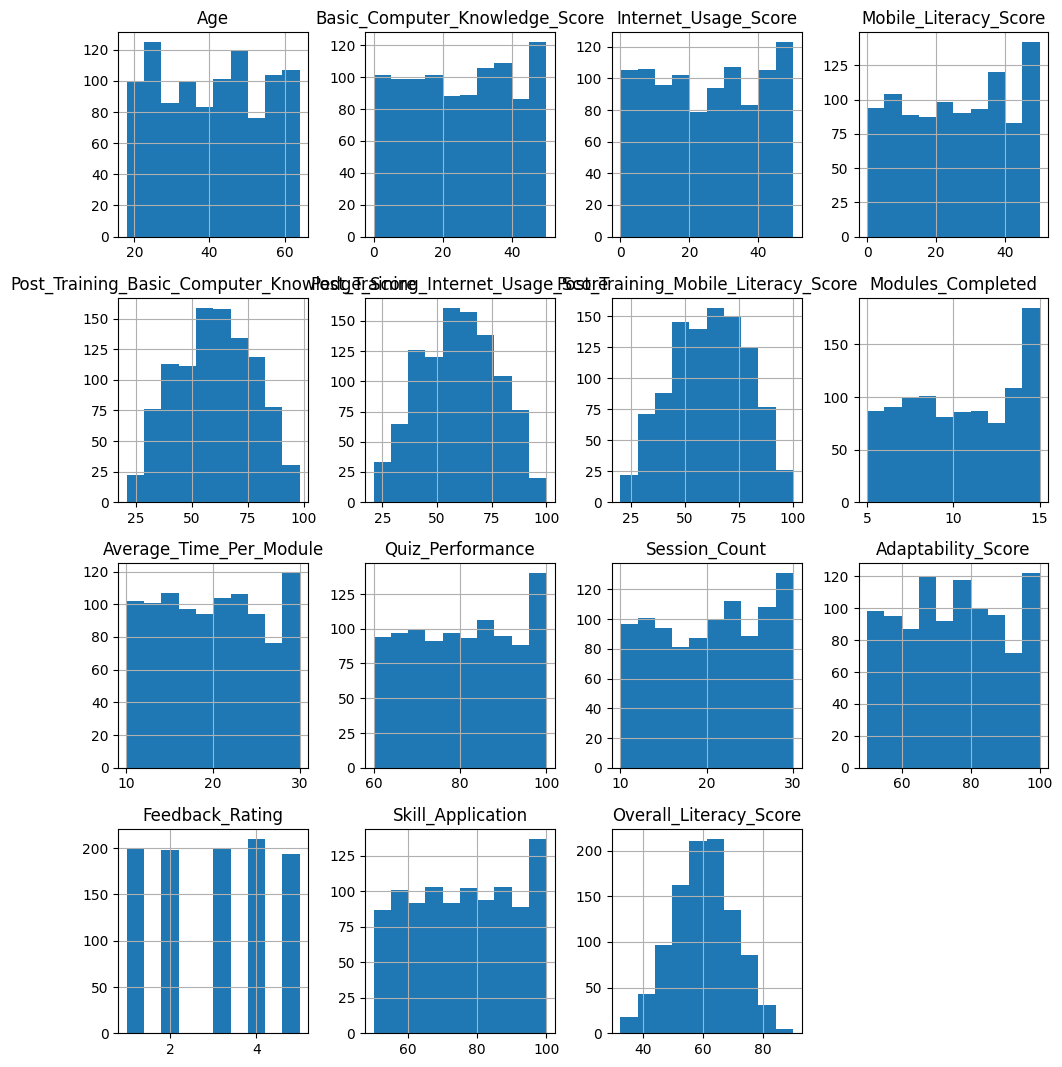

In [33]:
'''
Visualize a histogram of all the numerical attributes. 
'''
digital_lit_df.hist(figsize=(12,13))

## Insight #2 (Digital Literacy Education Dataset)
- **Insight**: In terms of demographic insights about the dataset, there was an equal distribution of males and females, there was an equal distribution of education levels (primary, secondary, and highschool), and there was an approximately equal distribution among employment statuses. Majority of individuals belonged to a Rural location, and had a low household income (60% of individuals). 
- **Type of Analysis**: r2: Univariate analysis (Categorical Data - Countplot)

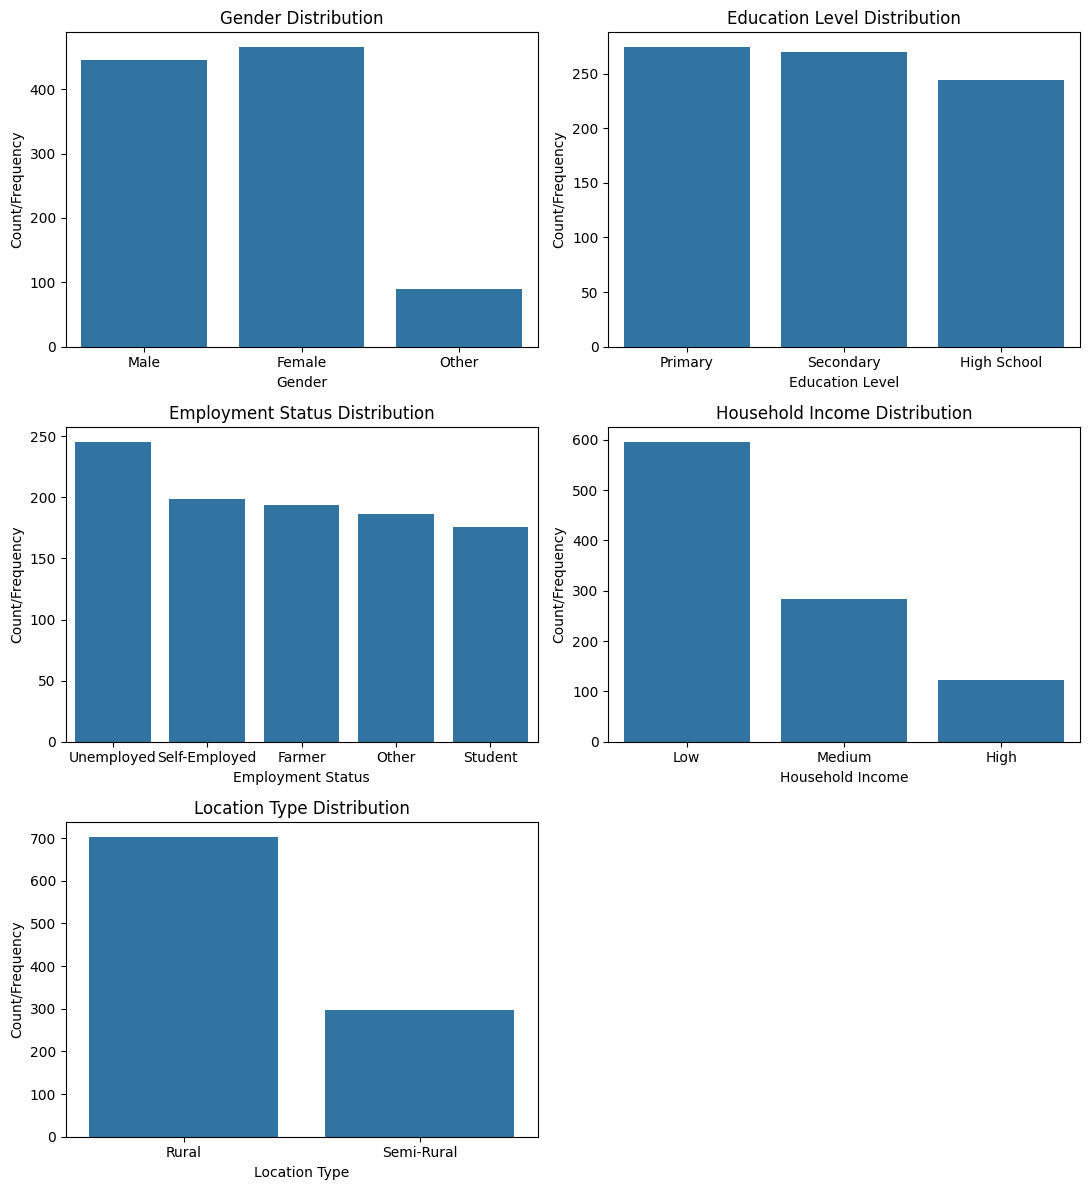

In [34]:
'''
UNIVARIATE CATEGORICAL ANALYSIS for Demographic Data
- Plot all the demographic data and understand the trends. 
'''

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 12)) 

# Equal distribution of males and females in the experiment.
sns.countplot(x="Gender", data=digital_lit_df, ax=axes[0][0])
axes[0][0].set_title("Gender Distribution")
axes[0][0].set_xlabel("Gender")
axes[0][0].set_ylabel("Count/Frequency")

# Equal distrbution among different education levels - Primary, Secondary, High School
sns.countplot(x="Education_Level", data=digital_lit_df, order=digital_lit_df["Education_Level"].value_counts().index, ax=axes[0][1])
axes[0][1].set_title("Education Level Distribution")
axes[0][1].set_xlabel("Education Level")
axes[0][1].set_ylabel("Count/Frequency")

# There is an equal proportion of individuals among the groups of self-employed, farmer, other, and student
# With a slightly higher prevalence of people unemployeoed
sns.countplot(x="Employment_Status", data=digital_lit_df, order=digital_lit_df["Employment_Status"].value_counts().index, ax=axes[1][0])
axes[1][0].set_title("Employment Status Distribution")
axes[1][0].set_xlabel("Employment Status")
axes[1][0].set_ylabel("Count/Frequency")

# 60% of the sample size have a low income household, with 30$ haveing a medium, and only 10% have a high income household. 
sns.countplot(x="Household_Income", data=digital_lit_df, order=digital_lit_df["Household_Income"].value_counts().index, ax=axes[1][1])
axes[1][1].set_title("Household Income Distribution")
axes[1][1].set_xlabel("Household Income")
axes[1][1].set_ylabel("Count/Frequency")

# 70% are from Rural areas, and only 30% from semi-rural
sns.countplot(x="Location_Type", data=digital_lit_df, order=digital_lit_df["Location_Type"].value_counts().index, ax=axes[2][0])
axes[2][0].set_title("Location Type Distribution")
axes[2][0].set_xlabel("Location Type")
axes[2][0].set_ylabel("Count/Frequency")

fig.delaxes(axes[2][1])
plt.tight_layout()
plt.show()

## Insight #3 (Digital Literacy Education Dataset)
- **Insight**: In terms of the outcome measures of digital literacy training, most indiviudals (70%) reported that digital literacy training had no impact on employment. 
- **Type of Analysis**: r2: Univariate analysis (Categorical Data - Countplot)

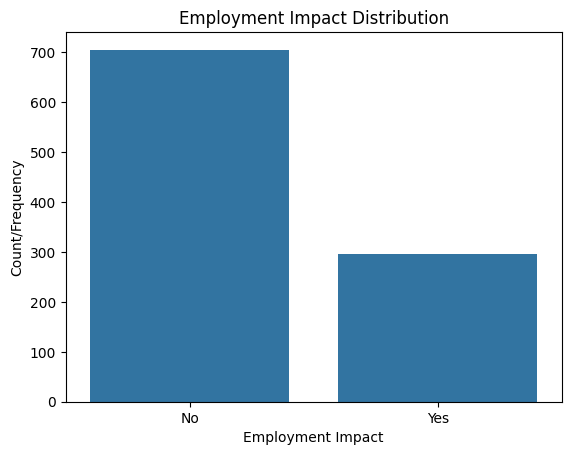

In [35]:
'''
UNIVARIATE CATEGORICAL ANALYSIS for Employment Impact
- Plot all the literacy based categorical data and understand trends. 
'''
# Generally there was no impact of digital literacy education on employment impact.
sns.countplot(x="Employment_Impact", data=digital_lit_df, order=digital_lit_df["Employment_Impact"].value_counts().index)
plt.title("Employment Impact Distribution")
plt.xlabel("Employment Impact")
plt.ylabel("Count/Frequency")

plt.show()

## Insight #4 (Digital Literacy Education Dataset)
- **Insight**: If an individual lives is from a low or medium income household, they are more likely to be from a Rural location, compared to being from a Semi-Rural location. 
- **Type of Analysis**: r5: Bivariate analysis (Categorical/Categorical Data - Comparing categories with more than 2 values)

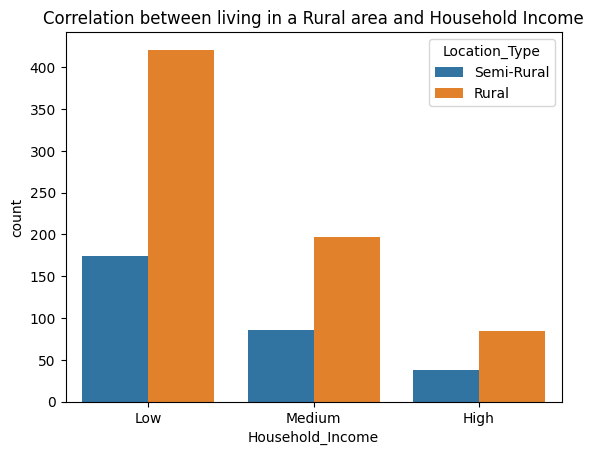

In [36]:
'''
Relation between household_income and location_type
- Individuals of low or medium income household income are more likelyto be in rural areas by 50%. 
'''
sns.countplot(
    data=digital_lit_df, 
    x="Household_Income", 
    hue="Location_Type", 
    order=digital_lit_df["Household_Income"].value_counts().index
)
plt.title("Correlation between living in a Rural area and Household Income")
plt.show()

In [37]:
'''
Plot the cross tabulation values for Household_Income and Location_Type
- Shows that for Rural areas, majority are low income.
- Compared to semi-rural, there is a substantially larger proportion from low income. 
'''
pd.crosstab(
    digital_lit_df["Location_Type"], 
    digital_lit_df["Household_Income"], 
    margins=True
)

Household_Income,High,Low,Medium,All
Location_Type,,,,
Rural,84,421,197,702
Semi-Rural,38,174,86,298
All,122,595,283,1000


## Insight #5 (Digital Literacy Education Dataset)
- **Insight**: There is no difference in engagement levels in the digital literacy training, regardless of individuals have a primary school, secondary school, or highschool education level. 
- **Type of Analysis**: r5: Bivariate analysis (Categorical/Categorical Data - Comparing categories with more than 2 values)

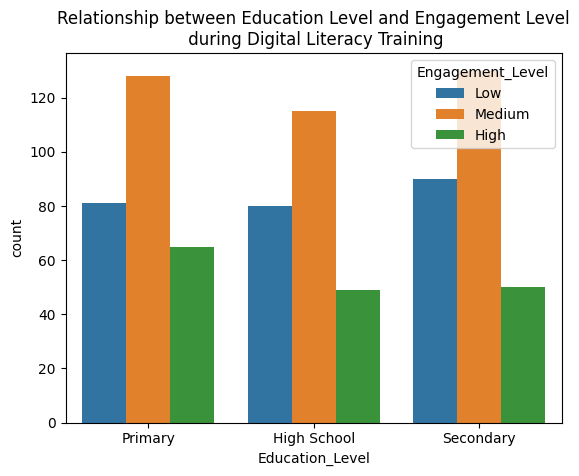

In [38]:
# No difference in engagement level, regarding of if the education level is primary, secondary, or hs.
sns.countplot(data=digital_lit_df, x="Education_Level", hue="Engagement_Level")
plt.title("Relationship between Education Level and Engagement Level\n during Digital Literacy Training")
plt.show()

In [39]:
'''
Numbers show almost the same number of people in highschool, secondary, and primary school
across the different engagement levels in the digital literacy training program. 
'''
pd.crosstab(digital_lit_df["Education_Level"], digital_lit_df["Engagement_Level"], margins=True)

Engagement_Level,High,Low,Medium,All
Education_Level,,,,
High School,49,80,115,244
Primary,65,81,128,274
Secondary,50,90,130,270
All,164,251,373,788


## Insight #6 (Digital Literacy Education Dataset)
- **Insight**: There is no relation between the Engagement in the Digital Literacy Education and Overall Literacy Rates achieved. Engagement metrics refer to session counts, modules completed, average time spend per module, and quiz performance.  
- **Type of Analysis**: r6: Bivariate analysis (Numerical/Numerical Data - Using Scatterplots)

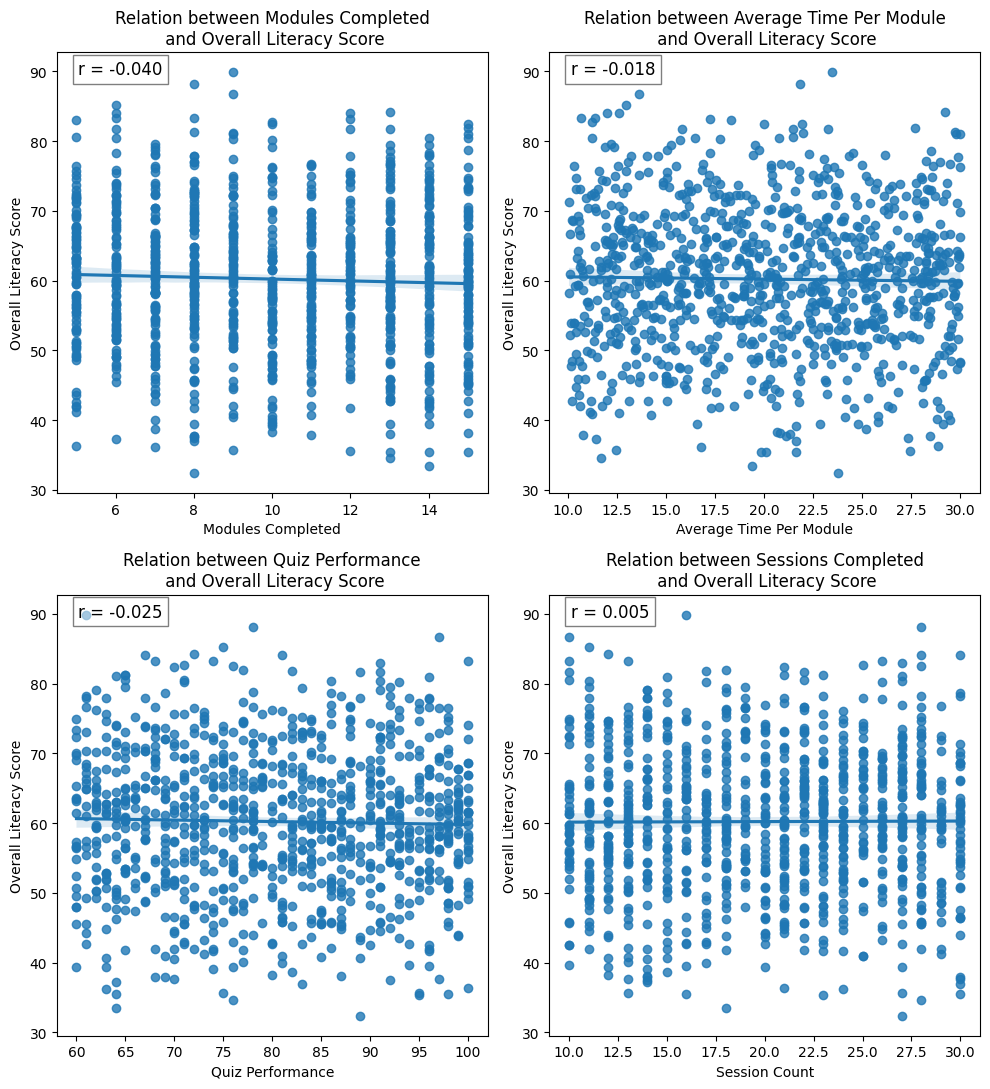

In [40]:
'''
Numerical/Numerical Bivariate Analysis 
- The aim is to try and understand if there's a relation between the engagement metrics 
  (sessions counts, modules completed, average time per module, and quiz performance) and 
  the final overall literacy score. 
'''

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 11)) 

# Modules Completed x Overall Literacy Score
sns.regplot(data=digital_lit_df, x="Modules_Completed", y="Overall_Literacy_Score", ax=axes[0][0])
axes[0][0].set_title("Relation between Modules Completed\n and Overall Literacy Score")
axes[0][0].set_xlabel("Modules Completed")
axes[0][0].set_ylabel("Overall Literacy Score")

r_value, p_value = stats.pearsonr(digital_lit_df["Modules_Completed"], digital_lit_df["Overall_Literacy_Score"])
axes[0][0].text(
    0.05, 0.95, f"r = {r_value:.3f}",
    fontsize=12, transform=axes[0][0].transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)

# Average Time per Module x Overall Literacy Score
sns.regplot(data=digital_lit_df, x="Average_Time_Per_Module", y="Overall_Literacy_Score", ax=axes[0][1])
axes[0][1].set_title("Relation between Average Time Per Module\n and Overall Literacy Score")
axes[0][1].set_xlabel("Average Time Per Module")
axes[0][1].set_ylabel("Overall Literacy Score")

r_value, p_value = stats.pearsonr(digital_lit_df["Average_Time_Per_Module"], digital_lit_df["Overall_Literacy_Score"])
axes[0][1].text(
    0.05, 0.95, f"r = {r_value:.3f}",
    fontsize=12, transform=axes[0][1].transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)

# Quiz Performance x Overall Literacy Score
sns.regplot(data=digital_lit_df, x="Quiz_Performance", y="Overall_Literacy_Score", ax=axes[1][0])
axes[1][0].set_title("Relation between Quiz Performance\n and Overall Literacy Score")
axes[1][0].set_xlabel("Quiz Performance")
axes[1][0].set_ylabel("Overall Literacy Score")

r_value, p_value = stats.pearsonr(digital_lit_df["Quiz_Performance"], digital_lit_df["Overall_Literacy_Score"])
axes[1][0].text(
    0.05, 0.95, f"r = {r_value:.3f}",
    fontsize=12, transform=axes[1][0].transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)

# Session Count x Overall Literacy Score
sns.regplot(data=digital_lit_df, x="Session_Count", y="Overall_Literacy_Score", ax=axes[1][1])
axes[1][1].set_title("Relation between Sessions Completed\n and Overall Literacy Score")
axes[1][1].set_xlabel("Session Count")
axes[1][1].set_ylabel("Overall Literacy Score")

r_value, p_value = stats.pearsonr(digital_lit_df["Session_Count"], digital_lit_df["Overall_Literacy_Score"])
axes[1][1].text(
    0.05, 0.95, f"r = {r_value:.3f}",
    fontsize=12, transform=axes[1][1].transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)

plt.tight_layout()
plt.show()

## Insight #7 (Digital Literacy Education Dataset)
- **Insight**: Similar to overall literacy rates, there is no correlation between engagement metrics (session count, modules completed, average time per module, quiz performance) during digital literacy training and post training basic computer knowledge scores. 
- **Type of Analysis**: r6: Bivariate analysis (Numerical/Numerical Data - Using Scatterplots)

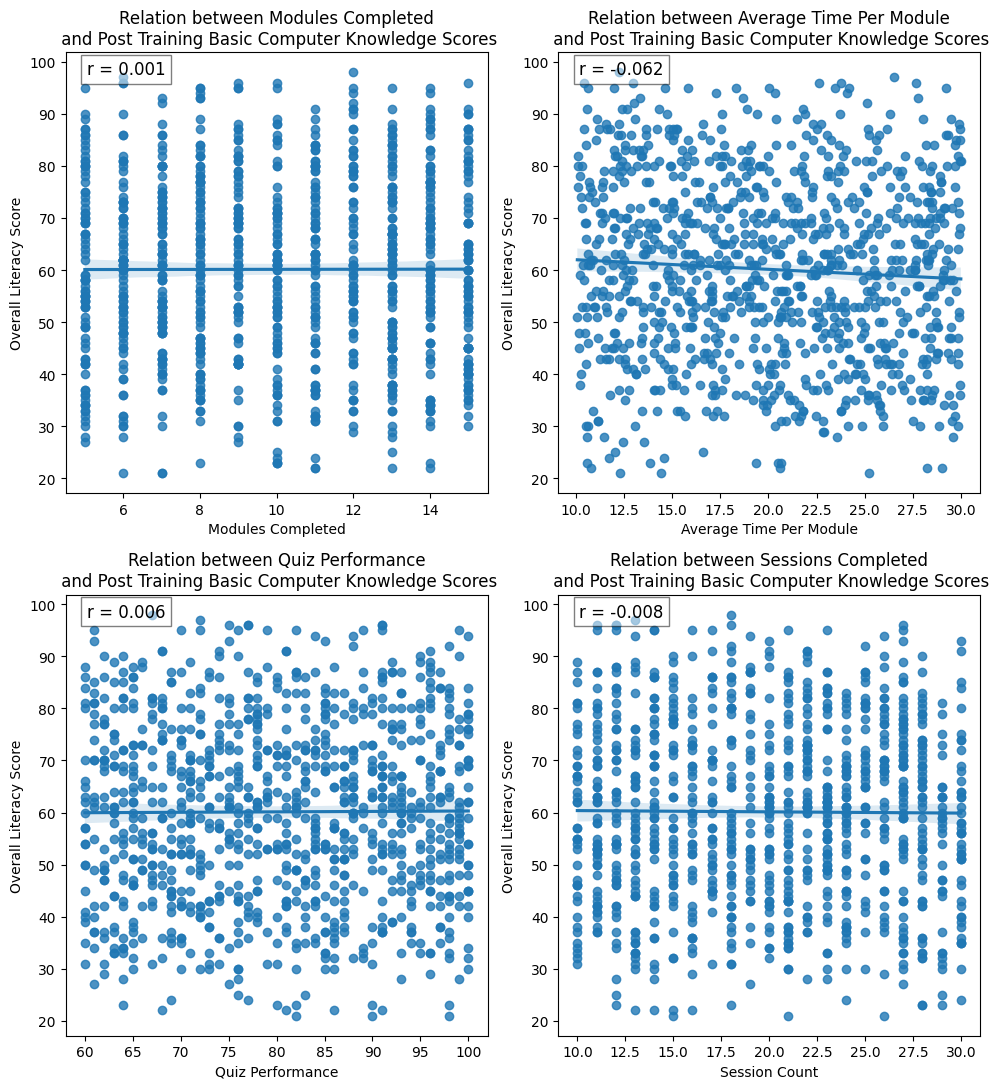

In [41]:
'''
Numerical/Numerical Bivariate Analysis 
- The aim is to try and understand if there's a relation between the engagement metrics 
  (sessions counts, modules completed, average time per module, and quiz performance) and 
  the final overall literacy score. 
'''

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 11)) 

# Modules Completed x Overall Literacy Score
sns.regplot(data=digital_lit_df, x="Modules_Completed", y="Post_Training_Basic_Computer_Knowledge_Score", ax=axes[0][0])
axes[0][0].set_title("Relation between Modules Completed\n and Post Training Basic Computer Knowledge Scores")
axes[0][0].set_xlabel("Modules Completed")
axes[0][0].set_ylabel("Overall Literacy Score")

r_value, p_value = stats.pearsonr(digital_lit_df["Modules_Completed"], digital_lit_df["Post_Training_Basic_Computer_Knowledge_Score"])
axes[0][0].text(
    0.05, 0.95, f"r = {r_value:.3f}",
    fontsize=12, transform=axes[0][0].transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)

# Average Time per Module x Overall Literacy Score
sns.regplot(data=digital_lit_df, x="Average_Time_Per_Module", y="Post_Training_Basic_Computer_Knowledge_Score", ax=axes[0][1])
axes[0][1].set_title("Relation between Average Time Per Module\n and Post Training Basic Computer Knowledge Scores")
axes[0][1].set_xlabel("Average Time Per Module")
axes[0][1].set_ylabel("Overall Literacy Score")

r_value, p_value = stats.pearsonr(digital_lit_df["Average_Time_Per_Module"], digital_lit_df["Post_Training_Basic_Computer_Knowledge_Score"])
axes[0][1].text(
    0.05, 0.95, f"r = {r_value:.3f}",
    fontsize=12, transform=axes[0][1].transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)

# Quiz Performance x Overall Literacy Score
sns.regplot(data=digital_lit_df, x="Quiz_Performance", y="Post_Training_Basic_Computer_Knowledge_Score", ax=axes[1][0])
axes[1][0].set_title("Relation between Quiz Performance\n and Post Training Basic Computer Knowledge Scores")
axes[1][0].set_xlabel("Quiz Performance")
axes[1][0].set_ylabel("Overall Literacy Score")

r_value, p_value = stats.pearsonr(digital_lit_df["Quiz_Performance"], digital_lit_df["Post_Training_Basic_Computer_Knowledge_Score"])
axes[1][0].text(
    0.05, 0.95, f"r = {r_value:.3f}",
    fontsize=12, transform=axes[1][0].transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)

# Session Count x Overall Literacy Score
sns.regplot(data=digital_lit_df, x="Session_Count", y="Post_Training_Basic_Computer_Knowledge_Score", ax=axes[1][1])
axes[1][1].set_title("Relation between Sessions Completed\n and Post Training Basic Computer Knowledge Scores")
axes[1][1].set_xlabel("Session Count")
axes[1][1].set_ylabel("Overall Literacy Score")

r_value, p_value = stats.pearsonr(digital_lit_df["Session_Count"], digital_lit_df["Post_Training_Basic_Computer_Knowledge_Score"])
axes[1][1].text(
    0.05, 0.95, f"r = {r_value:.3f}",
    fontsize=12, transform=axes[1][1].transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)

plt.tight_layout()
plt.show()

## Insight #8 (Digital Literacy Education Dataset)
- **Insight**: There is a strong positive correlation between pre-training values and post-training values for basic computer knowledge score (r=0.86), internet usage score (r=0.86), and mobile literacy scores (r=0.86). Furthermore, there is a moderate correlation between pre-training and post-training values for basic computer knowledge, internet usage, and mobile literacy with overall literacy score. This means that those scores correlate positively with overall literacy scores. 
- **Type of Analysis**: r6: Bivariate analysis (Numerical/Numerical Data - Using Heatmap)

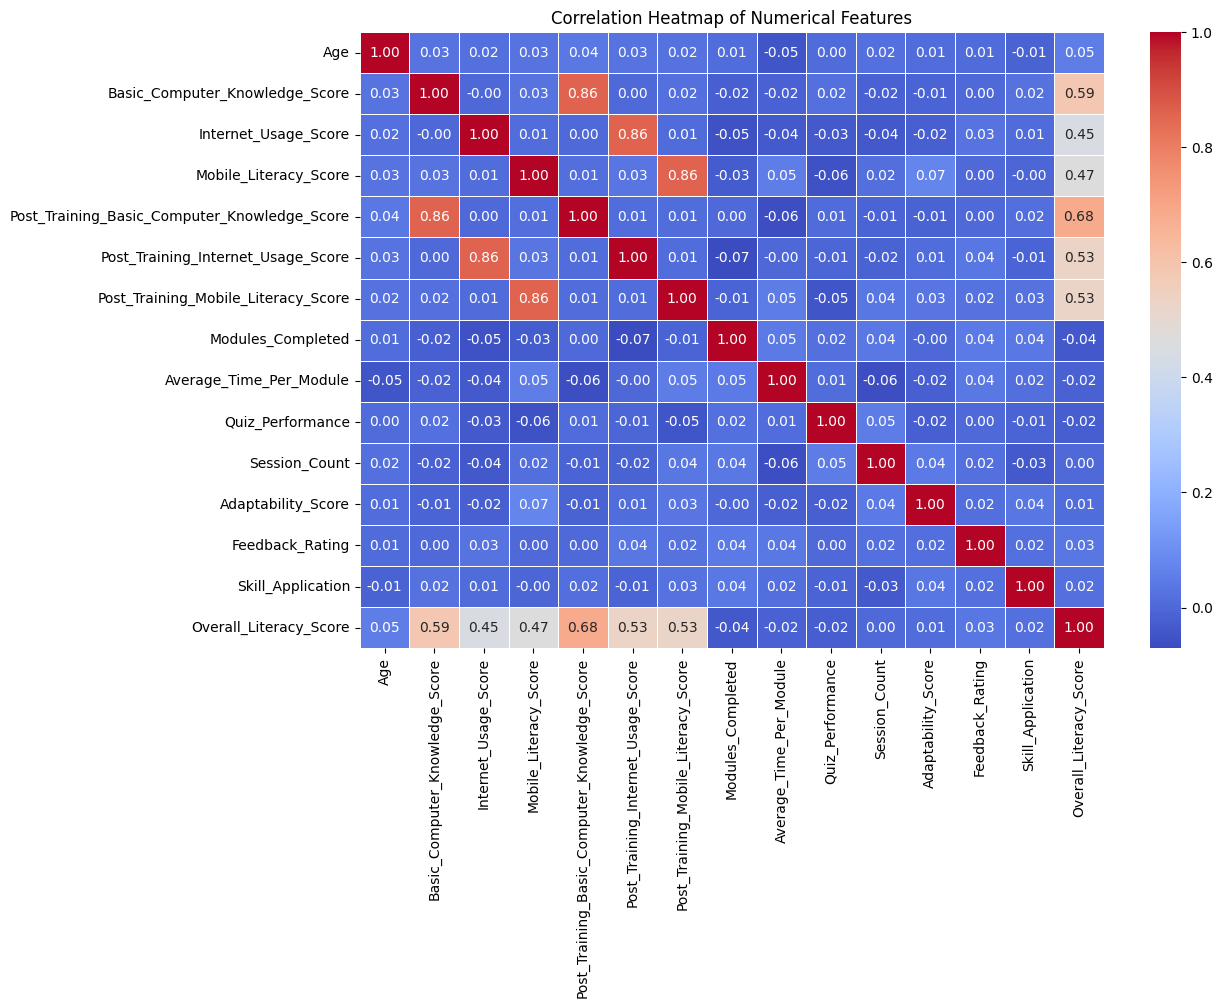

In [42]:
'''
Use Heat Map to visualize correlations between numerical attributes.
'''
numerical_digital_lit_df = digital_lit_df.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_digital_lit_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Insight #9 (Digital Literacy Education Dataset)
- **Insight**: There is no correlation between age and overall literacy scores. 
- **Type of Analysis**: r6: Bivariate analysis (Numerical/Numerical Data - Scatterplot)

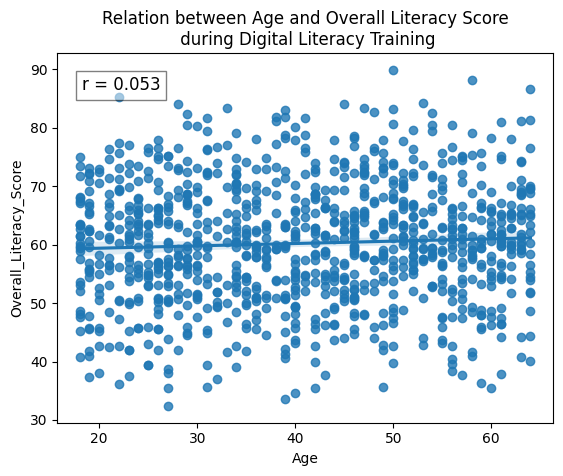

In [43]:
'''
Visualize if there's a relation between Age and Overall Literacy Score.
'''
sns.regplot(x="Age", y="Overall_Literacy_Score", data=digital_lit_df)
r_value, p_value = stats.pearsonr(digital_lit_df["Age"], digital_lit_df["Overall_Literacy_Score"])
plt.text(
    0.05, 0.9, f"r = {r_value:.3f}",
    fontsize=12, transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)
plt.title("Relation between Age and Overall Literacy Score\n during Digital Literacy Training")
plt.show()

## Insight #10 (Digital Literacy Education Dataset)
- **Insight**: There appears to be no correlation between demographic information (location type, education level, household income, employment status) on overall literacy scores. The mean values literacy scores are the same across all attributes in each demographic category. 
- **Type of Analysis**: r7: Bivariate analysis (Numerical/Categorical Data - Boxplots)

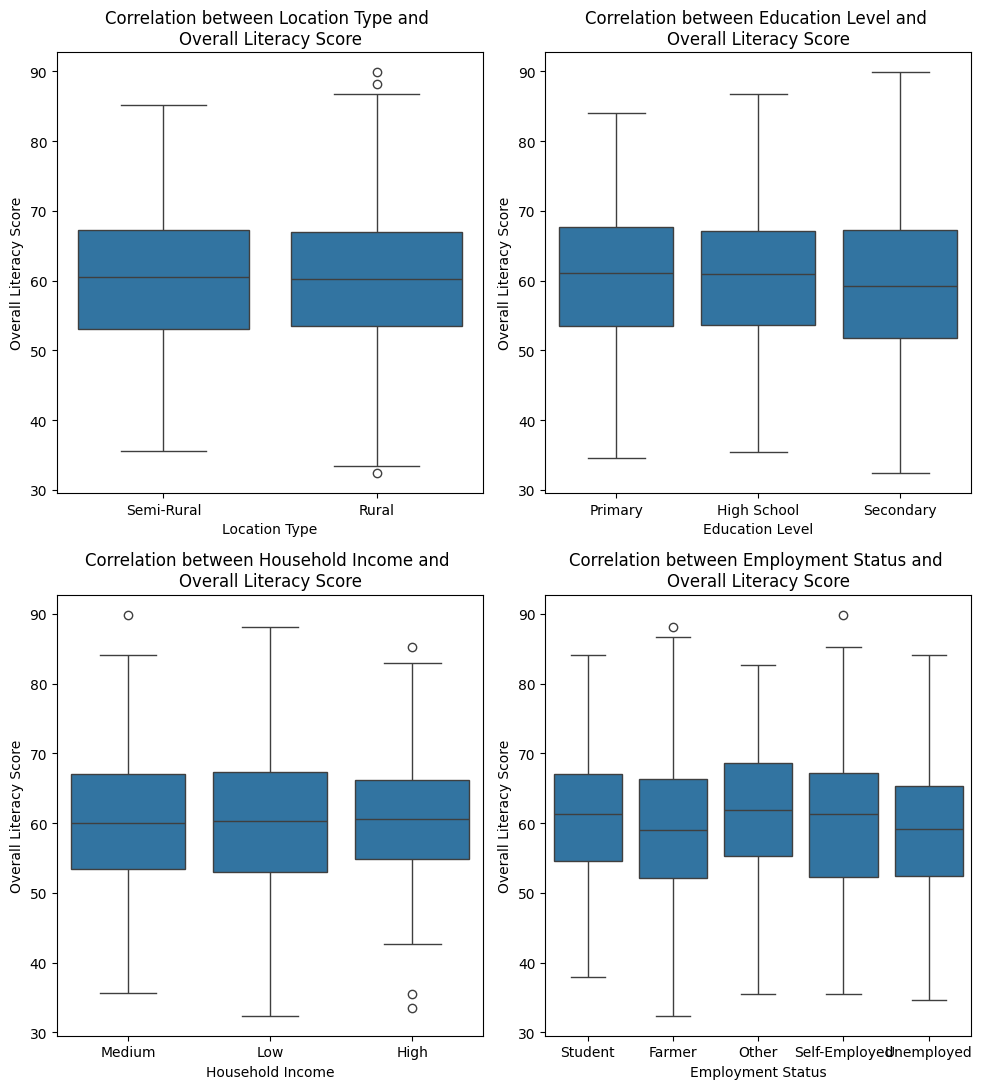

In [44]:
'''
View correlation between demographic information and overall literacy scores.
'''

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 11)) 

sns.boxplot(x="Location_Type", y="Overall_Literacy_Score", data=digital_lit_df, ax=axes[0][0])
axes[0][0].set_title("Correlation between Location Type and \nOverall Literacy Score")
axes[0][0].set_xlabel("Location Type")
axes[0][0].set_ylabel("Overall Literacy Score")

sns.boxplot(x="Education_Level", y="Overall_Literacy_Score", data=digital_lit_df, ax=axes[0][1])
axes[0][1].set_title("Correlation between Education Level and \nOverall Literacy Score")
axes[0][1].set_xlabel("Education Level")
axes[0][1].set_ylabel("Overall Literacy Score")

sns.boxplot(x="Household_Income", y="Overall_Literacy_Score", data=digital_lit_df, ax=axes[1][0])
axes[1][0].set_title("Correlation between Household Income and \nOverall Literacy Score")
axes[1][0].set_xlabel("Household Income")
axes[1][0].set_ylabel("Overall Literacy Score")

sns.boxplot(x="Employment_Status", y="Overall_Literacy_Score", data=digital_lit_df, ax=axes[1][1])
axes[1][1].set_title("Correlation between Employment Status and \nOverall Literacy Score")
axes[1][1].set_xlabel("Employment Status")
axes[1][1].set_ylabel("Overall Literacy Score")

plt.tight_layout()
plt.show()

## Conclusion
The Digital Literacy Education Dataset provides insights into the effectiveness of digital literacy training in Rural and Semi-Rural areas. 

### Key Takeaways
- The dataset included an equal distribution in gender, education level, as well as digital literacy scores before training.
- Age has no impact on overall literacy scores, suggesting that digital training may be equally effective across age groups. 
- The level of digital literacy after training is strongly correlated (r=0.86) with the level of literacy before training. Other factors like household income, employment status, location type, and education level don't make a difference in the overall literacy levels found after training.
- Although literacy scores were higher after training, most participants found no impact on employment. 

## References
- (Matplotlib Docs)[https://matplotlib.org/stable/api/index.html]
- (Kaggle Dataset)[https://www.kaggle.com/datasets/ziya07/digital-literacy-education-dataset]
- (Pandas Docs)[https://pandas.pydata.org/docs/reference/index.html]
- (Seaborn Docs)[https://docs.scipy.org/doc/scipy/reference/index.html]
- ChatGPT Snippet to figure out how to make layouts - Prompt: How do I generate a layout that composes multiple categorical graphs in the same cell? 